### Importing Dependencies

In [1]:
#importing the dependencies
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
#Getting the data

cifar10 = tf.keras.datasets.cifar10
(X_train,y_train),(X_test,y_test) = cifar10.load_data()

170500096/170498071 [==============================] - 2s 0us/step


In [3]:
#Analysis of the datasets
print("--------- Train Datasets----------")
print("Shape of the X_train is: ", X_train.shape)
print("Shape of the y_train is: ", y_train.shape)
print("\n")
print("--------- Test Datasets----------")
print("Shape of the X_test is: ", X_test.shape)
print("Shape of the y_test is: ", y_test.shape)

--------- Train Datasets----------
Shape of the X_train is:  (50000, 32, 32, 3)
Shape of the y_train is:  (50000, 1)


--------- Test Datasets----------
Shape of the X_test is:  (10000, 32, 32, 3)
Shape of the y_test is:  (10000, 1)


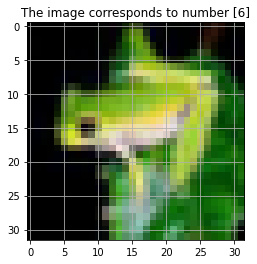

In [4]:
random_serial = 104
plt.imshow(X_train[random_serial], cmap = "gray")
plt.grid(True)
plt.title("The image corresponds to number " + str(y_train[random_serial]))
plt.show()

In [5]:
#Normalizing the data
print("Maximum pixel value before normalizing is:", X_train.max())
print("Minimum pixel value before normalizing is:", X_train.min())

X_train = X_train/255.
X_test = X_test/255.

#Maximum and Minimum for X_test, X_train will be in the same range
print("Maximum pixel value before normalizing is:", X_train.max())
print("Minimum pixel value before normalizing is:", X_train.min())

Maximum pixel value before normalizing is: 255
Minimum pixel value before normalizing is: 0
Maximum pixel value before normalizing is: 1.0
Minimum pixel value before normalizing is: 0.0


In [7]:
X_train[0].shape

(32, 32, 3)

### Defining the model

In [8]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPool2D

def my_model():
  model = Sequential()
  model.add(Conv2D(filters = 64, kernel_size = (3,3), activation = "relu", input_shape= (32,32,3)))
  model.add(MaxPool2D(pool_size = (2,2)))
  model.add(Conv2D(filters = 32, kernel_size = (3,3), activation = "relu"))
  model.add(MaxPool2D(pool_size = (2,2)))
  model.add(Conv2D(filters = 16, kernel_size = (3,3), activation = "relu"))
  model.add(MaxPool2D(pool_size = (3,3)))
  model.add(Flatten())
  model.add(Dense(units = 128, activation = "relu"))
  model.add(Dense(units = 10, activation = "softmax"))

  model.compile(loss = "sparse_categorical_crossentropy", optimizer = "adam", metrics = ["accuracy"])

  return model

In [9]:
model = my_model()

In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 30, 30, 64)        1792      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 15, 15, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 13, 13, 32)        18464     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 6, 32)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 4, 4, 16)          4624      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 1, 1, 16)          0         
_________________________________________________________________
flatten (Flatten)            (None, 16)                0

In [11]:
from tensorflow.keras.callbacks import EarlyStopping
callback = EarlyStopping(monitor = "val_loss", patience = 10)

In [12]:
history_data = model.fit(X_train, y_train, epochs = 5000, validation_data= (X_test,y_test), callbacks = [callback])

Epoch 1/5000
1563/1563 [==============================] - 13s 4ms/step - loss: 1.9311 - accuracy: 0.2661 - val_loss: 1.6299 - val_accuracy: 0.4162
Epoch 2/5000
1563/1563 [==============================] - 6s 4ms/step - loss: 1.4976 - accuracy: 0.4511 - val_loss: 1.4052 - val_accuracy: 0.4918
Epoch 3/5000
1563/1563 [==============================] - 5s 4ms/step - loss: 1.3596 - accuracy: 0.5058 - val_loss: 1.2888 - val_accuracy: 0.5392
Epoch 4/5000
1563/1563 [==============================] - 5s 3ms/step - loss: 1.2642 - accuracy: 0.5493 - val_loss: 1.2362 - val_accuracy: 0.5609
Epoch 5/5000
1563/1563 [==============================] - 6s 4ms/step - loss: 1.2163 - accuracy: 0.5668 - val_loss: 1.1951 - val_accuracy: 0.5710
Epoch 6/5000
1563/1563 [==============================] - 5s 4ms/step - loss: 1.1608 - accuracy: 0.5835 - val_loss: 1.1827 - val_accuracy: 0.5827
Epoch 7/5000
1563/1563 [==============================] - 5s 4ms/step - loss: 1.1267 - accuracy: 0.5961 - val_loss: 1.2151 

In [15]:
l = len(history_data.history["loss"])

history_df = pd.DataFrame(history_data.history, index = list(range(1,l+1)))
history_df

,loss,accuracy,val_loss,val_accuracy
1,1.748852,0.34454,1.629884,0.4162
2,1.459384,0.46630,1.405168,0.4918
3,1.337374,0.51648,1.288828,0.5392
4,1.258369,0.54918,1.236166,0.5609
5,1.207444,0.56814,1.195086,0.5710
6,1.165160,0.58282,1.182686,0.5827
7,1.131851,0.59608,1.215057,0.5699
8,1.102516,0.60558,1.155865,0.5827
9,1.073986,0.61740,1.158204,0.5875
10,1.056800,0.62442,1.204160,0.5738


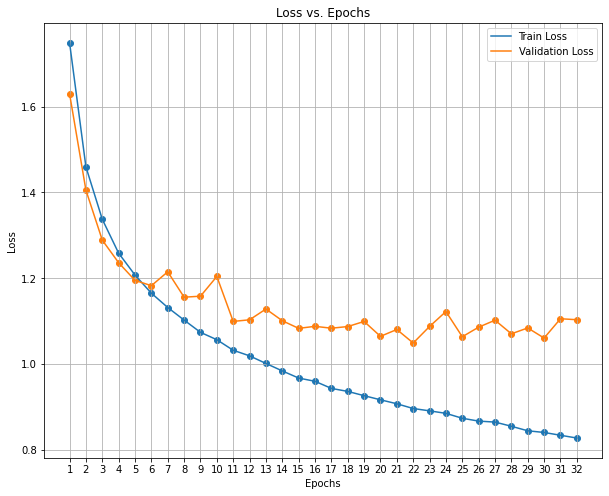

In [17]:
#Plotting the acciracy

l = len(history_data.history["loss"]) + 1

plt.subplots(figsize = (10,8))
plt.plot(np.arange(1, l),history_df["loss"])
plt.scatter(np.arange(1, l),history_df["loss"])

plt.plot(np.arange(1, l),history_df["val_loss"])
plt.scatter(np.arange(1, l),history_df["val_loss"])

plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.xticks(np.arange(1, l))
plt.title("Loss vs. Epochs")
plt.grid(True)
plt.legend(('Train Loss', 'Validation Loss'))
plt.show()

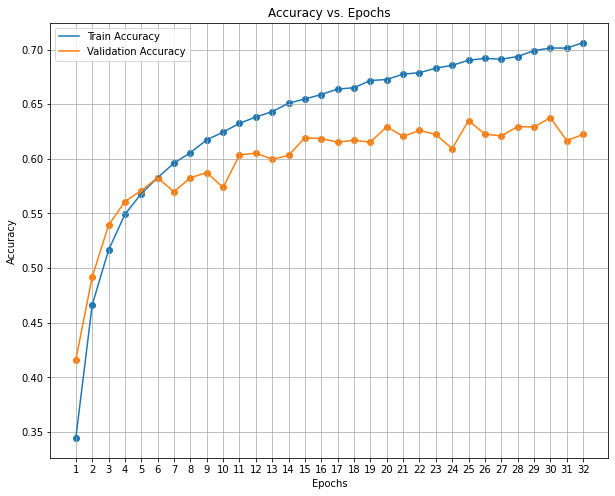

In [18]:
#Plotting the acciracy

l = len(history_data.history["loss"]) + 1

plt.subplots(figsize = (10,8))
plt.plot(np.arange(1, l),history_df["accuracy"])
plt.scatter(np.arange(1, l),history_df["accuracy"])

plt.plot(np.arange(1, l),history_df["val_accuracy"])
plt.scatter(np.arange(1, l),history_df["val_accuracy"])

plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.xticks(np.arange(1, l))
plt.title("Accuracy vs. Epochs")
plt.grid(True)
plt.legend(('Train Accuracy', 'Validation Accuracy'))
plt.show()

In [19]:
pred = model.predict_classes(X_test, verbose = 1)

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


313/313 [==============================] - 1s 1ms/step


In [23]:
classification_df = pd.DataFrame({
    "y_test_actual" : y_test.squeeze(),
    "y_test_predicted" : pred
})

In [24]:
classification_df

,y_test_actual,y_test_predicted
0,3,8
1,8,8
2,8,8
3,0,0
4,6,6
...,...,...
9995,8,3
9996,3,3
9997,5,5
9998,1,4


In [25]:
from sklearn.metrics import classification_report, confusion_matrix

print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.69      0.59      0.64      1000
           1       0.83      0.66      0.73      1000
           2       0.57      0.46      0.51      1000
           3       0.42      0.43      0.42      1000
           4       0.57      0.61      0.59      1000
           5       0.53      0.62      0.57      1000
           6       0.59      0.81      0.68      1000
           7       0.76      0.55      0.64      1000
           8       0.64      0.80      0.71      1000
           9       0.74      0.69      0.72      1000

    accuracy                           0.62     10000
   macro avg       0.63      0.62      0.62     10000
weighted avg       0.63      0.62      0.62     10000



In [26]:
print(confusion_matrix(y_test, pred))

[[593  35  77  30  24  15  22  14 161  29]
 [ 39 658  13  14   8  13  33   5  86 131]
 [ 56   4 460  87 111 100 131  17  24  10]
 [ 17   3  56 426  64 227 145  25  28   9]
 [ 17   6  57  55 613  34 137  55  20   6]
 [  5   4  49 182  50 621  41  30  12   6]
 [  3   4  27  90  31  17 806   6   6  10]
 [ 24   2  45  64 143 117  22 553  11  19]
 [ 80  21   9  24  16  11  11   7 798  23]
 [ 31  60  17  37  10  13  19  19  99 695]]


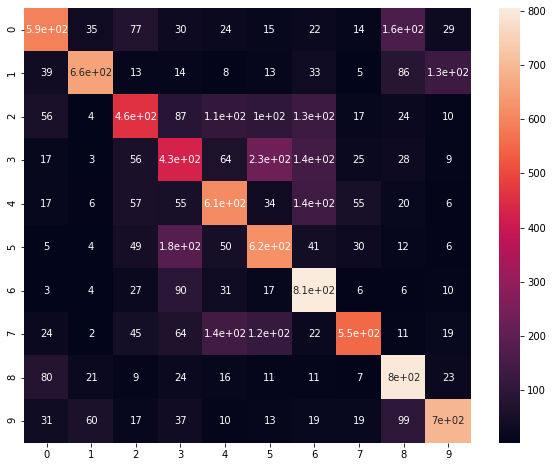

In [27]:
import seaborn as sns
plt.figure(figsize = (10,8))
sns.heatmap(confusion_matrix(y_test, pred), annot = True)
plt.show()

In [29]:
random_num = 121
print("Actual class is", y_test[random_num])
p = model.predict_classes(X_test[121].reshape(1,32,32,3))
print("Predicted class is", p.item())

Actual class is [3]
Predicted class is 4


/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '
